In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Reading the CSV into DF

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Read the data file
df = pd.read_csv('/content/drive/MyDrive/Data Mining/HW 4/Clothing_Shoes_and_Jewelry_10.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head(100)

,overall,vote,verified,style,reviewText,summary
0,4.0,NaN,True,"{'Size:': ' One Size', 'Color:': ' Red'}","Love it, thanks",Four Stars
1,5.0,NaN,True,{'Color:': ' Black/Grey Gradient'},Very nice glasses but not what I intended to o...,Very nice glasses but not what I intended to o...
2,5.0,NaN,True,"{'Size:': ' 2T', 'Color:': ' Green'}","This is such a cute little ""girly girl"" outfit...",PRECIOUS OUTFIT
3,5.0,NaN,True,"{'Size:': ' Small', 'Color:': ' Army Green'}","My wife loved it, nice product and looks very ...",Five Stars
4,5.0,NaN,True,NaN,I love this! The size is true to the chart. It...,Love it!!!
...,...,...,...,...,...,...
95,5.0,NaN,True,NaN,Awesome thick socks.,Five Stars
96,4.0,NaN,True,NaN,Good,Four Stars
97,5.0,NaN,True,"{'Size:': ' 20mm', 'Color:': ' Blue'}",Received the blue & purple watch bands today. ...,Received the blue & purple watch bands today. ...
98,5.0,NaN,True,NaN,I really love this outfit. The quality is grea...,Love love love it!


# Verfied

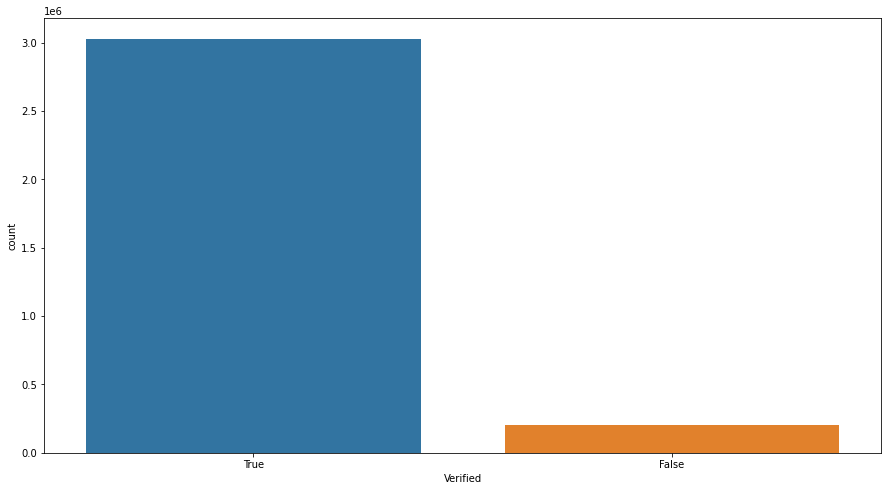

In [ ]:
#Get the Number of Reviews that are verified
plt.figure(figsize=(15,8))
sns.countplot(
    x = 'verified',
    data = df,
    order = df.verified.value_counts().index
)
plt.xlabel("Verified")
plt.show()

# Number of Votes

In [6]:
df.shape

(3229210, 6)

In [7]:
null_table = df.isna().sum()
null_table

overall             0
vote          2941266
verified            0
style          655645
reviewText       3881
summary          1539
dtype: int64

In [12]:
df['vote_null'] = np.where(df['vote'].isna(), "NaN", "Value")

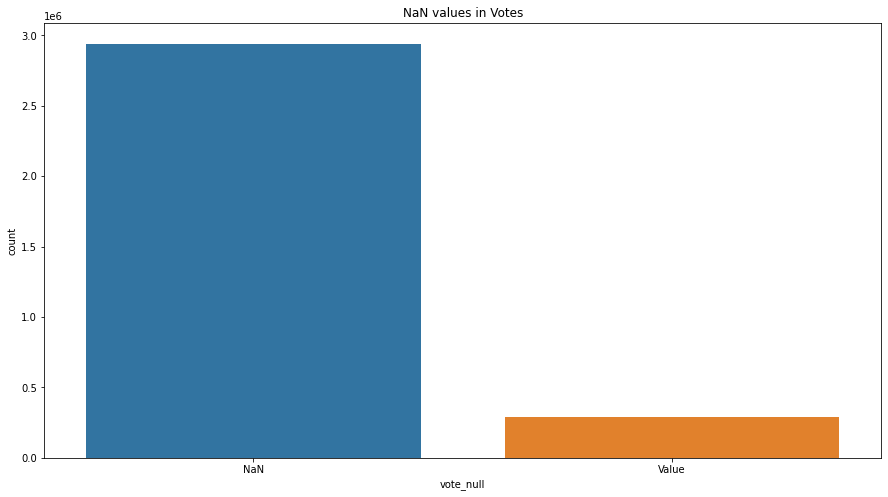

In [14]:
#Get the Number of Reviews that don't have Votes
plt.figure(figsize=(15,8))
sns.countplot(
    x = 'vote_null',
    data = df,
    order = df.vote_null.value_counts().index
)
plt.title("NaN values in Votes")
plt.show()

In [ ]:
df.shape[0] - null_table['vote']

287944

In [ ]:
df_without_nan = df.dropna(subset=['vote'])

In [ ]:
df_without_nan.isna().sum()

overall           0
vote              0
verified          0
style         68333
reviewText      567
summary         114
dtype: int64

In [ ]:
df_without_nan.dtypes['vote']

dtype('O')

In [ ]:
df_without_nan['vote'] = df_without_nan['vote'].str.replace(',', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_without_nan["vote"] = pd.to_numeric(df_without_nan["vote"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_without_nan.head()

,overall,vote,verified,style,reviewText,summary,vote_group
6,5.0,2.0,True,{'Color:': ' Black'},"Great leather, nice design, and very prettying...",Good quality!,"(-4.896, 1381.2]"
13,4.0,2.0,True,{'Color:': ' Brown'},Great for dress-up. We used this to add to co...,Harry Potter mad eye moody eyeball,"(-4.896, 1381.2]"
21,2.0,4.0,False,"{'Size:': ' Medium', 'Color:': ' black'}","Don't worry guys, if you play it like this he ...",if you play it like this he won't even be able...,"(-4.896, 1381.2]"
23,5.0,4.0,True,{'Color:': ' 11 Gray'},This is a really nice scarf -- especially for ...,Beautiful Scarf For The Price!,"(-4.896, 1381.2]"
24,5.0,3.0,True,{'Color:': ' Fb61-64-sb41'},Love the variety of colors/patterns and quanti...,Good deal!,"(-4.896, 1381.2]"


In [ ]:
#Divide the votes into buckets
df_without_nan['vote_group'] = pd.cut(df_without_nan['vote'], bins=[-10, 5, 10, 20, 50, 80, 100, 200, 1000, 9000])

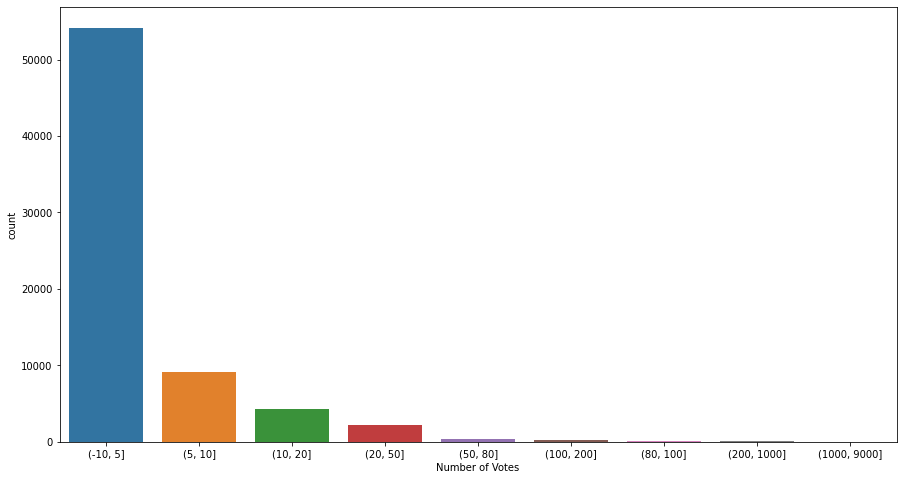

In [ ]:
#Get the Number of Reviews that are Votes
plt.figure(figsize=(15,8))
sns.countplot(
    x = 'vote_group',
    data = df_without_nan,
    order = df_without_nan.vote_group.value_counts().index
)
plt.xlabel("Number of Votes")
plt.show()

In [ ]:
df_without_nan['vote_group'].value_counts()

(-10, 5]        54185
(5, 10]          9069
(10, 20]         4354
(20, 50]         2134
(50, 80]          410
(100, 200]        178
(80, 100]         126
(200, 1000]        54
(1000, 9000]        2
Name: vote_group, dtype: int64

# Text Length

In [15]:
df['reviewText_word_count'] = df["reviewText"].apply(lambda x: len(str(x).split(' ')))

In [16]:
df.head()

,overall,vote,verified,style,reviewText,summary,vote_null,reviewText_word_count
0,4.0,NaN,True,"{'Size:': ' One Size', 'Color:': ' Red'}","Love it, thanks",Four Stars,NaN,3
1,5.0,NaN,True,{'Color:': ' Black/Grey Gradient'},Very nice glasses but not what I intended to o...,Very nice glasses but not what I intended to o...,NaN,33
2,5.0,NaN,True,"{'Size:': ' 2T', 'Color:': ' Green'}","This is such a cute little ""girly girl"" outfit...",PRECIOUS OUTFIT,NaN,65
3,5.0,NaN,True,"{'Size:': ' Small', 'Color:': ' Army Green'}","My wife loved it, nice product and looks very ...",Five Stars,NaN,12
4,5.0,NaN,True,NaN,I love this! The size is true to the chart. It...,Love it!!!,NaN,14


In [ ]:
df['word_count_group'] = pd.cut(df['reviewText_word_count'], bins=[-1, 5, 10, 20, 50, 80, 100, 200, 1000, 9000])

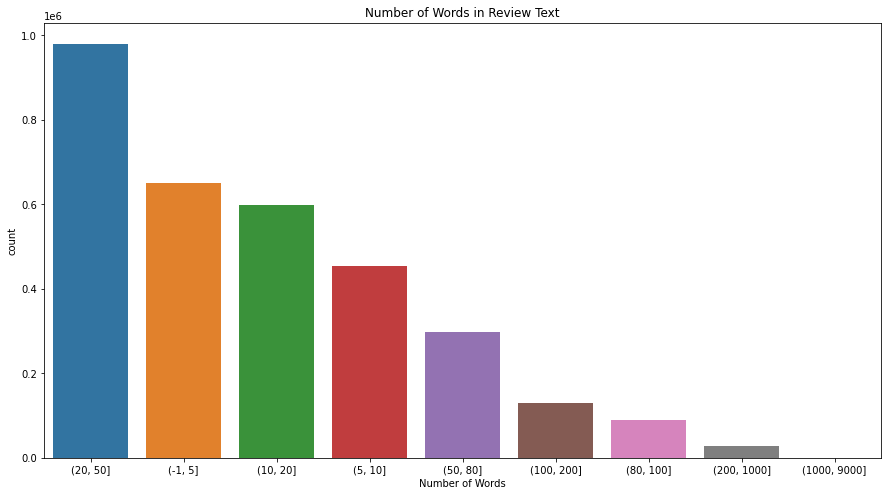

In [ ]:
#Get the Distribution of text length
plt.figure(figsize=(15,8))
sns.countplot(
    x = 'word_count_group',
    data = df,
    order = df.word_count_group.value_counts().index
)
plt.xlabel("Number of Words")
plt.title("Number of Words in Review Text")
plt.show()

In [ ]:
df['word_count_group'].value_counts()

(20, 50]        980230
(-1, 5]         651123
(10, 20]        598305
(5, 10]         452822
(50, 80]        298551
(100, 200]      129300
(80, 100]        90170
(200, 1000]      28599
(1000, 9000]       110
Name: word_count_group, dtype: int64

In [17]:
df_0_5 = df.loc[(df['reviewText_word_count'] >= 0) & (df['reviewText_word_count'] <= 5)]

In [19]:
df_0_5.head(50)

,overall,vote,verified,style,reviewText,summary,vote_null,reviewText_word_count
0,4.0,NaN,True,"{'Size:': ' One Size', 'Color:': ' Red'}","Love it, thanks",Four Stars,NaN,3
9,5.0,NaN,True,"{'Size:': ' 8', 'Color:': ' Lilac'}",Nice,Five Stars,NaN,1
10,5.0,NaN,True,NaN,Good!,Five Stars,NaN,1
16,4.0,NaN,True,"{'Color:': ' Brushed Stainless', 'Package Type...",So far so good,Hopeful,NaN,4
18,5.0,NaN,True,"{'Size:': ' 44 M EU', 'Color:': ' Habana Oiled...",excellent shoes,Five Stars,NaN,2
20,5.0,NaN,True,"{'Size:': ' One Size', 'Color:': ' Black/Purpl...",thank you,Five Stars,NaN,2
30,5.0,NaN,True,"{'Size:': ' Medium', 'Color:': ' Black'}",I love this jacket,Five Stars,NaN,4
32,5.0,NaN,True,"{'Size:': ' 9 B(M) US', 'Color:': ' Black Kiddy'}",Great fit,Five Stars,NaN,2
47,5.0,NaN,True,{'Color:': ' Milled Black'},Absolutely great !....... Highly recommended,Hey... Sometimes we make a good decision.,NaN,5
49,5.0,NaN,True,{'Size:': ' 12 Months'},Very cute and soft too!,Five Stars,NaN,5


Creating Graph


<function matplotlib.pyplot.show>

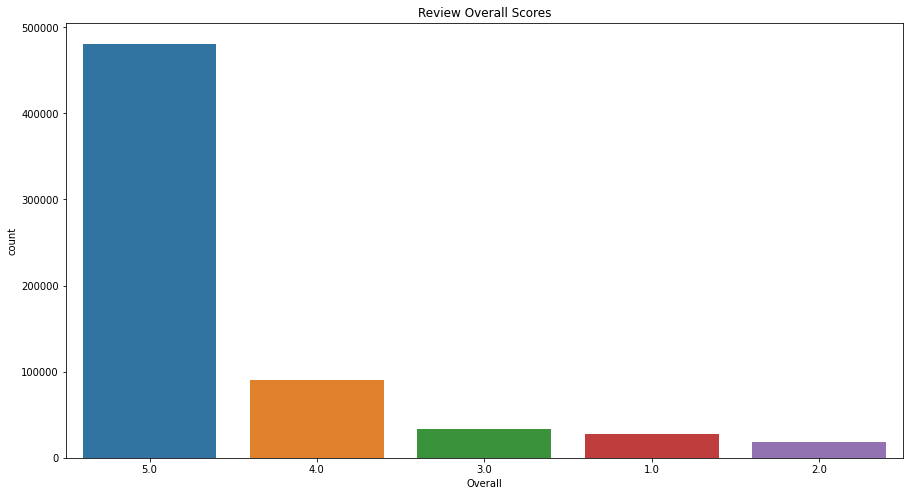

In [18]:
print("Creating Graph")
plt.figure(figsize=(15,8))
sns.countplot(
    x = 'overall',
    data = df_0_5,
    order = df_0_5.overall.value_counts().index
)
plt.xlabel("Overall")
plt.title("Review Overall Scores")
plt.show